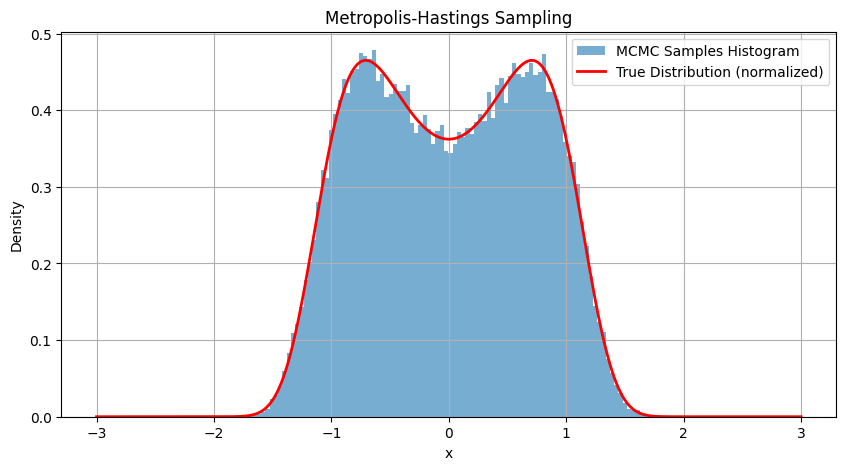

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 目標分佈：p(x) ∝ e^{-x^4 + x^2}
def target_distribution(x):
    return np.exp(-x**4 + x**2)

# MCMC: Metropolis-Hastings
def metropolis_hastings(p, n_samples=10000, proposal_std=1.0):
    samples = []
    x = 0  # 初始點
    for _ in range(n_samples):
        x_new = x + np.random.normal(0, proposal_std)  # 提議一個新點
        acceptance_ratio = p(x_new) / p(x)
        if np.random.rand() < acceptance_ratio:  # 接受機率
            x = x_new
        samples.append(x)
    return np.array(samples)

# 執行 MCMC
samples = metropolis_hastings(target_distribution, n_samples=100000, proposal_std=1.0)

# 畫出結果
x_vals = np.linspace(-3, 3, 1000)
true_dist = target_distribution(x_vals)
true_dist /= np.trapz(true_dist, x_vals)  # 標準化使其成為機率分布

plt.figure(figsize=(10,5))
plt.hist(samples, bins=100, density=True, alpha=0.6, label='MCMC Samples Histogram')
plt.plot(x_vals, true_dist, color='red', lw=2, label='True Distribution (normalized)')
plt.title("Metropolis-Hastings Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

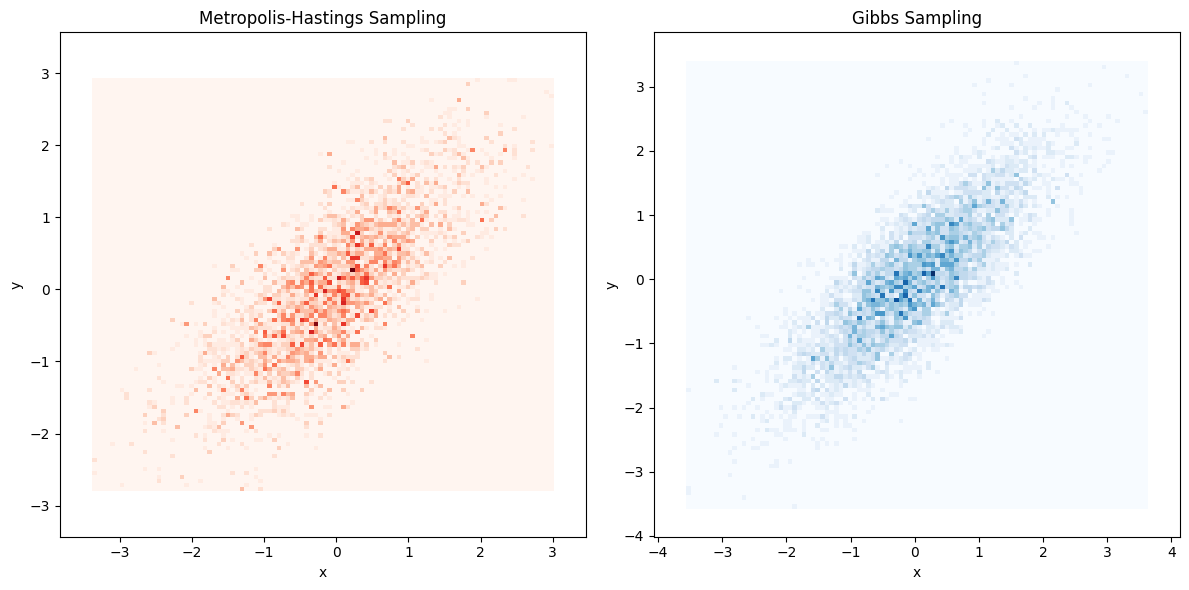

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# ===== 1. 目標分布設定 =====
mean = np.array([0, 0])
cov = np.array([[1, 0.8], [0.8, 1]])
target_dist = multivariate_normal(mean, cov)

# ===== 2. Metropolis-Hastings 採樣 =====
def metropolis_hastings_2d(n_samples=5000, proposal_std=0.5):
    samples = []
    x, y = 0.0, 0.0  # 初始點

    for _ in range(n_samples):
        # 提議新點（從 proposal 分布中取樣）
        x_new = x + np.random.normal(0, proposal_std)
        y_new = y + np.random.normal(0, proposal_std)

        # 接受機率 = p(new) / p(old)
        p_new = target_dist.pdf([x_new, y_new])
        p_old = target_dist.pdf([x, y])
        alpha = min(1, p_new / p_old)

        if np.random.rand() < alpha:
            x, y = x_new, y_new

        samples.append([x, y])
    return np.array(samples)

# ===== 3. Gibbs 採樣 =====
def gibbs_sampling(n_samples=5000):
    samples = []
    x, y = 0.0, 0.0

    for _ in range(n_samples):
        # p(x | y) ∼ N(0.8*y, 0.36)
        x = np.random.normal(0.8 * y, np.sqrt(0.36))
        # p(y | x) ∼ N(0.8*x, 0.36)
        y = np.random.normal(0.8 * x, np.sqrt(0.36))
        samples.append([x, y])
    return np.array(samples)

# ===== 4. 執行採樣 =====
mh_samples = metropolis_hastings_2d()
gibbs_samples = gibbs_sampling()

# ===== 5. 畫出樣本分布 =====
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist2d(mh_samples[:, 0], mh_samples[:, 1], bins=100, density=True, cmap='Reds')
axs[0].set_title("Metropolis-Hastings Sampling")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].axis('equal')

axs[1].hist2d(gibbs_samples[:, 0], gibbs_samples[:, 1], bins=100, density=True, cmap='Blues')
axs[1].set_title("Gibbs Sampling")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].axis('equal')

plt.tight_layout()
plt.show()